In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from joblib import dump
from joblib import load

In [3]:
%%capture
all_ratings = pd.read_csv('https://raw.githubusercontent.com/baiyuankok/EEG-Analysis/master/STEW%20Original%20Dataset/ratings.txt', header=None)
# current_dir = '/content/drive/MyDrive/STEW Features (Classification-Copy3 (for KNN)-Improved)'
current_dir =  os.listdir ("/content/drive/MyDrive/STEW Features (Classification-Copy3 (for KNN)-Improved)")

In [4]:
current_dir

['01_lo.csv',
 '02_lo.csv',
 '03_lo.csv',
 '15_lo.csv',
 '07_lo.csv',
 '11_lo.csv',
 '16_lo.csv',
 '08_lo.csv',
 '12_lo.csv',
 '18_lo.csv',
 '06_lo.csv',
 '09_lo.csv',
 '13_lo.csv',
 '17_lo.csv',
 '14_lo.csv',
 '10_lo.csv',
 '04_lo.csv',
 '23_lo.csv',
 '21_lo.csv',
 '28_lo.csv',
 '29_lo.csv',
 '25_lo.csv',
 '20_lo.csv',
 '26_lo.csv',
 '22_lo.csv',
 '27_lo.csv',
 '19_lo.csv',
 '31_lo.csv',
 '35_lo.csv',
 '34_lo.csv',
 '38_lo.csv',
 '32_lo.csv',
 '39_lo.csv',
 '36_lo.csv',
 '37_lo.csv',
 '43_lo.csv',
 '33_lo.csv',
 '44_lo.csv',
 '30_lo.csv',
 '40_lo.csv',
 '45_lo.csv',
 '46_lo.csv',
 '41_lo.csv',
 '01_hi.csv',
 '07_hi.csv',
 '03_hi.csv',
 '13_hi.csv',
 '02_hi.csv',
 '10_hi.csv',
 '11_hi.csv',
 '14_hi.csv',
 '48_lo.csv',
 '06_hi.csv',
 '15_hi.csv',
 '47_lo.csv',
 '12_hi.csv',
 '04_hi.csv',
 '09_hi.csv',
 '08_hi.csv',
 '29_hi.csv',
 '31_hi.csv',
 '19_hi.csv',
 '17_hi.csv',
 '16_hi.csv',
 '20_hi.csv',
 '26_hi.csv',
 '30_hi.csv',
 '22_hi.csv',
 '32_hi.csv',
 '23_hi.csv',
 '18_hi.csv',
 '28_h

In [5]:
eeg_data = []
ratings_list = []
iterator = 1

for current_file in current_dir:
    if current_file[-3:] == 'csv':
        subject = int(current_file[0:2])
        rating = all_ratings[all_ratings[0] == subject] 
        if len(rating)==0:
            rating_array = np.array([[0,0,0]])
        else:
            rating_array = rating.values
        
        current_file_dataframe = pd.read_csv('/content/drive/MyDrive/STEW Features (Classification-Copy3 (for KNN)-Improved)/' + current_file, header='infer', index_col=0)
        eeg_data_numerical = current_file_dataframe.to_numpy().reshape(1, -1, 70)
        current_file_dataframe['subj'] = subject
        current_file_dataframe['hilo'] = current_file[3:5]
        if current_file[3:5] == 'hi':
            current_file_dataframe['subjective_rating'] = rating_array[0][2]
            ratings_list.append(rating_array[0][2])
        else:
            current_file_dataframe['subjective_rating'] = rating_array[0][1]
            ratings_list.append(rating_array[0][1])
            
        if iterator == 1:
            X = eeg_data_numerical
        else:
            X = np.insert(X, len(X), eeg_data_numerical, axis=0)
        iterator += 1

        y = np.array(ratings_list)
#         eeg_data.append(current_file_dataframe)
#         X = current_file_dataframe.to_numpy().reshape(2, 3, 4)

# X = current_file_dataframe.shape        
# eeg_data = pd.concat(eeg_data)

In [6]:
subjective_ratings_grouped = [ 1 if (i == 1) else 2 if (2 <= i <= 3) else 3 if (4 <= i <= 5) else 4 if (6 <= i <= 7) else 5 for i in y ]

y = np.array(subjective_ratings_grouped)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify= y, random_state = 4)

In [7]:
nsamples, nx, ny = X_train.shape
X_train_reshaped = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test_reshaped = X_test.reshape((nsamples,nx*ny))

In [8]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

def randomSearchForBestParameter(clf, param_grid, title, X_train, y_train):
    # -----------------------------------------------------
#     cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    n_iter_search = 100
    randomSearch = RandomizedSearchCV(clf, 
                            param_distributions = param_grid,
                            n_iter = n_iter_search, 
                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    randomSearch.fit(X_train, y_train)  
    print("The best parameters are %s" % (randomSearch.best_params_)) 
    return randomSearch.best_estimator_

The best parameters are {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'bootstrap': False}
Best: 
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.33      0.20      0.25         5
           3       0.60      0.75      0.67         4
           4       0.67      0.80      0.73         5
           5       0.33      0.33      0.33         3

    accuracy                           0.52        23
   macro avg 

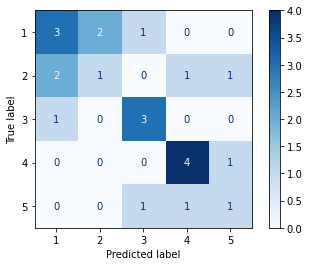

In [9]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf = BalancedRandomForestClassifier()

param_grid = {'bootstrap': [False],
             'max_features': ['auto'],
             'min_samples_leaf': [3,4,5],
             'min_samples_split': [3,5,10],
             'n_estimators': range(50, 800, 50),
             'random_state': [42]}

rf_best = randomSearchForBestParameter(rf, param_grid, "Balanced Random Forest", X_train_reshaped, y_train)
print("Best: ")
print(rf_best.get_params())
rf_best.fit(X_train_reshaped, y_train)
y_predict = rf_best.predict(X_test_reshaped)

class_names = list(set(y))
disp = plot_confusion_matrix(rf_best, X_test_reshaped, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))